In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from sklearn.linear_model import LinearRegression

Exercise 1, Q) e

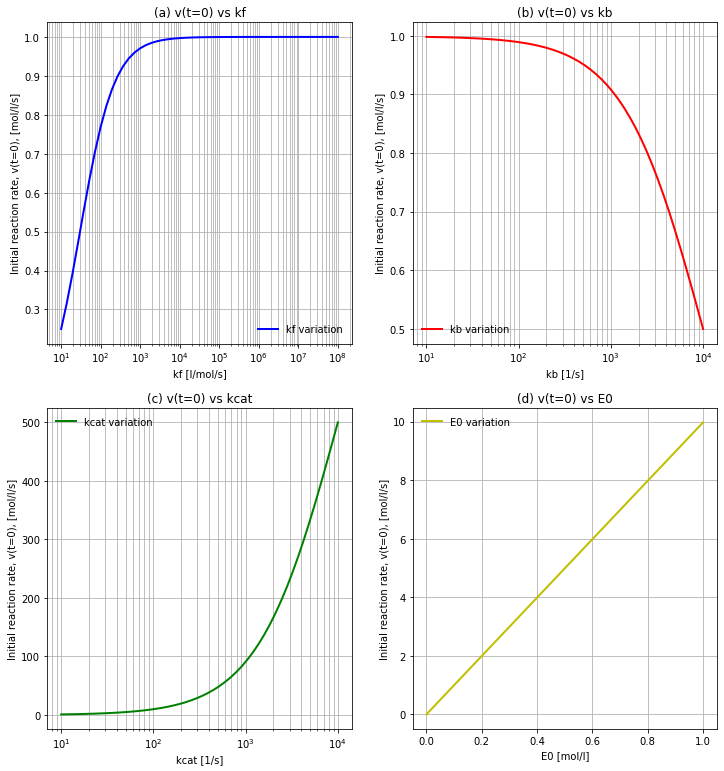

In [2]:
S0 = 1 #mol/l

E0= 0.1 #mol/l

P0 = 0 #mol/l

ES0=P0 #mol/l

kf = 10**4 #l/(mols)

kb = 20 #1/s

kcat = 10 #1/s

#creating ranges for the parameters one wants to modify
kf_range = np.logspace(1, 8) #l/(mols)
kb_range = np.logspace(1, 4) #1/s
kcat_range = np.logspace(1, 4) #1/s
E0_range = np.linspace(0,1) #mol/l

v_0_kf_vary = kcat*E0*S0/(((kb+kcat)/kf_range) +S0)
v_0_kb_vary = kcat*E0*S0/(((kb_range+kcat)/kf) +S0)
v_0_kcat_vary = kcat_range*E0*S0/(((kb+kcat_range)/kf) +S0)
v_0_E0_vary = kcat*E0_range*S0/(((kb+kcat)/kf) +S0)

#Plots 
fig, axs = plt.subplots(2, 2, figsize=(12,13))
axs[0,0].set_title('(a) v(t=0) vs kf')
axs[0,0].semilogx(kf_range,v_0_kf_vary,'b', linewidth=2)
axs[0,0].set_xlabel('kf [l/mol/s]', size=10)
axs[0,0].set_ylabel('Initial reaction rate, v(t=0), [mol/l/s]',  size=10)
axs[0,0].legend(["kf variation"], loc='lower right', frameon=False)
axs[0,0].grid(True, which="both")

axs[0,1].set_title('(b) v(t=0) vs kb')
axs[0,1].semilogx(kb_range,v_0_kb_vary,'r', linewidth=2)
axs[0,1].set_xlabel('kb [1/s]', size=10)
axs[0,1].set_ylabel('Initial reaction rate, v(t=0), [mol/l/s]',  size=10)
axs[0,1].legend(["kb variation"], loc='lower left', frameon=False)
axs[0,1].grid(True, which="both")

axs[1,0].set_title('(c) v(t=0) vs kcat')
axs[1,0].semilogx(kcat_range,v_0_kcat_vary,'g', linewidth=2)
axs[1,0].set_xlabel('kcat [1/s]', size=10)
axs[1,0].set_ylabel('Initial reaction rate, v(t=0), [mol/l/s]',  size=10)
axs[1,0].legend(["kcat variation"], loc='upper left', frameon=False)
axs[1,0].grid(True, which="both")

axs[1,1].set_title('(d) v(t=0) vs E0')
axs[1,1].plot(E0_range,v_0_E0_vary,'y', linewidth=2)
axs[1,1].set_xlabel('E0 [mol/l]', size=10)
axs[1,1].set_ylabel('Initial reaction rate, v(t=0), [mol/l/s]',  size=10)
axs[1,1].legend(["E0 variation"], loc='upper left', frameon=False)
axs[1,1].grid(True, which="both")

plt.savefig('Initial_velocity.eps', format='eps')

Exercise 1, Q) f

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


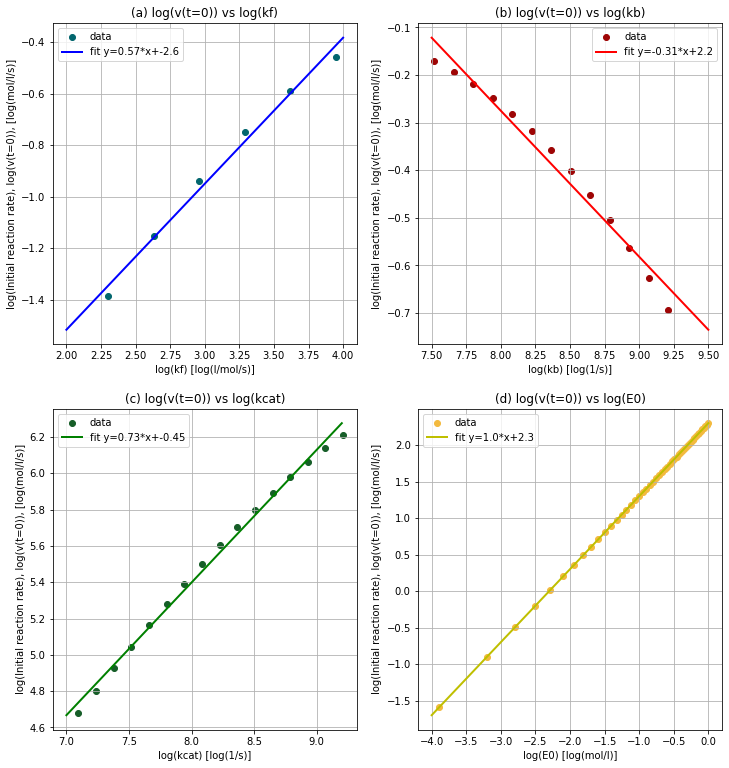

In [3]:
v0_kf_slope=v_0_kf_vary[np.log(kf_range)<=4]
kf_range_slope=kf_range[np.log(kf_range)<=4]
v0_kb_slope=v_0_kb_vary[np.log(kb_range)>=7.5]
kb_range_slope=kb_range[np.log(kb_range)>=7.5]
v0_kcat_slope=v_0_kcat_vary[np.log(kcat_range)>=7]
kcat_range_slope=kcat_range[np.log(kcat_range)>=7]
v0_E0_slope=v_0_E0_vary[E0_range>0]
E0_range_slope=E0_range[E0_range>0]

######### Fits #######
z_kf = np.polyfit(np.log(kf_range_slope), np.log(v0_kf_slope), 1)
x1_kf=np.linspace(2,4,100)
y1_kf = np.polyval(z_kf,x1_kf);

######### Fits ############

z_kb = np.polyfit(np.log(kb_range_slope), np.log(v0_kb_slope), 1)
x1_kb=np.linspace(7.5,9.5,100)
y1_kb = np.polyval(z_kb,x1_kb);

########## Fits #########

z_kcat = np.polyfit(np.log(kcat_range_slope), np.log(v0_kcat_slope), 1)
x1_kcat=np.linspace(7,9.2,100)
y1_kcat = np.polyval(z_kcat,x1_kcat);


########## Fits ###########

z_E0 = np.polyfit(np.log(E0_range_slope), np.log(v0_E0_slope), 1)
x1_E0=np.linspace(-4,0,100)
y1_E0 = np.polyval(z_E0,x1_E0);



############################
fig, axs = plt.subplots(2, 2, figsize=(12,13))
axs[0,0].set_title('(a) log(v(t=0)) vs log(kf)')
axs[0,0].scatter(np.log(kf_range_slope), np.log(v0_kf_slope), color = '#02666e', label = "data")
axs[0,0].plot(x1_kf, y1_kf, 'b', linewidth=2, label=f'fit y={z_kf[0]:.2}*x+{z_kf[1]:.2}')
axs[0,0].set_xlabel('log(kf) [log(l/mol/s)]', size=10)
axs[0,0].set_ylabel('log(Initial reaction rate), log(v(t=0)), [log(mol/l/s)]',  size=10)
axs[0,0].legend()
axs[0,0].grid(True, which="both")


axs[0,1].set_title('(b) log(v(t=0)) vs log(kb)')
axs[0,1].scatter(np.log(kb_range_slope), np.log(v0_kb_slope), color = '#9e0505', label = "data")
axs[0,1].plot(x1_kb, y1_kb, 'r', linewidth=2, label=f'fit y={z_kb[0]:.2}*x+{z_kb[1]:.2}')
axs[0,1].set_xlabel('log(kb) [log(1/s)]', size=10)
axs[0,1].set_ylabel('log(Initial reaction rate), log(v(t=0)), [log(mol/l/s)]',  size=10)
axs[0,1].legend()
axs[0,1].grid(True, which="both")

axs[1,0].set_title('(c) log(v(t=0)) vs log(kcat)')
axs[1,0].scatter(np.log(kcat_range_slope), np.log(v0_kcat_slope), color = '#165e28', label = "data")
axs[1,0].plot(x1_kcat, y1_kcat, 'g', linewidth=2, label=f'fit y={z_kcat[0]:.2}*x+{z_kcat[1]:.2}')
axs[1,0].set_xlabel('log(kcat) [log(1/s)]', size=10)
axs[1,0].set_ylabel('log(Initial reaction rate), log(v(t=0)), [log(mol/l/s)]',  size=10)
axs[1,0].legend()
axs[1,0].grid(True, which="both")

axs[1,1].set_title('(d) log(v(t=0)) vs log(E0)')
axs[1,1].scatter(np.log(E0_range_slope), np.log(v0_E0_slope), color = '#f3ba3f', label="data")
axs[1,1].plot(x1_E0, y1_E0, 'y', linewidth=2, label=f'fit y={z_E0[0]:.2}*x+{z_E0[1]:.2}')
axs[1,1].set_xlabel('log(E0) [log(mol/l)]', size=10)
axs[1,1].set_ylabel('log(Initial reaction rate), log(v(t=0)), [log(mol/l/s)]',  size=10)
axs[1,1].legend()
axs[1,1].grid(True, which="both")

plt.savefig('logloginitialvelocity.eps', format='eps')

Exercise 1, Q) h

In [4]:
t=np.linspace(start = 0, stop= 5, num = 5001) #s

S0 = 1 #mol/l

E0 = 0.1 #mol/l

P0 = 0 #mol/l

ES0 =P0 #mol/l

P0_1 =P0 #mol/l

kf = 10000 #l/mol/s

kb = 20 #1/s

kcat1 = 10 #1/s

kcat2 = 5 #1/s

V = 100 #l

initial_conditions = [E0*V, S0*V, ES0*V, P0*V, P0_1*V]


In [5]:
#Function that allows to solve the mass balance 

def equation (variables, t):
    CE, CS, CES, CP, CP_1 = variables / V
    
    r1 = kf * CE * CS
    r2 = kb *CES
    r3 = kcat1 * CES
    r4 = kcat2 *CES
    
    RE = -r1 +r2 +r3 + r4
    RS = -r1 +r2
    RES= r1 -r2 -r3 - r4
    RP= r3
    RP_1= r4
    
    dNE_dt = RE*V
    dNS_dt = RS*V
    dNES_dt = RES * V
    dNP_dt = RP * V
    dNP_1_dt = RP_1*V
    
    return dNE_dt, dNS_dt, dNES_dt, dNP_dt, dNP_1_dt

In [6]:
results = odeint(equation, initial_conditions, t)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


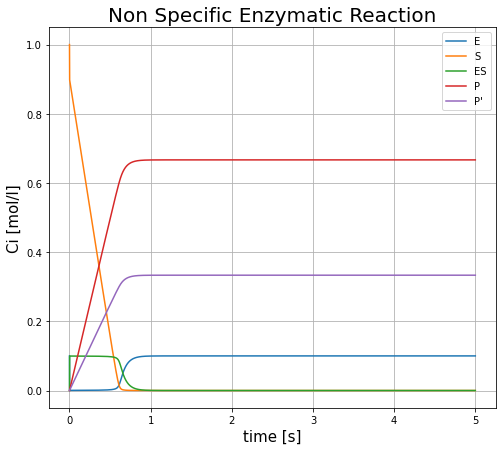

In [7]:
CE, CS, CES, CP, CP_1 = results.T/V

#Plot of the system

plt.figure(1, figsize=(8,7))
plt.title("Non Specific Enzymatic Reaction",  size=20)
plt.plot(t, CE, t, CS, t, CES, t, CP, t, CP_1)
plt.xlabel("time [s]", size=15)
plt.ylabel("Ci [mol/l]", size=15)
plt.legend(["E", "S", "ES", "P", "P'"])
plt.grid()
plt.savefig('non_enzymatic_reaction.eps', format='eps')
plt.show()


In [8]:
print(CP_1[-1]) #Undesired product concentration at steady state
print(CP[-1]) #Desired productconcentration at steady state
print(t[CP>=0.66][0]) # Time to steady state

0.33333333333334314
0.6666666666666863
0.771


Exercise 1, Q) i

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


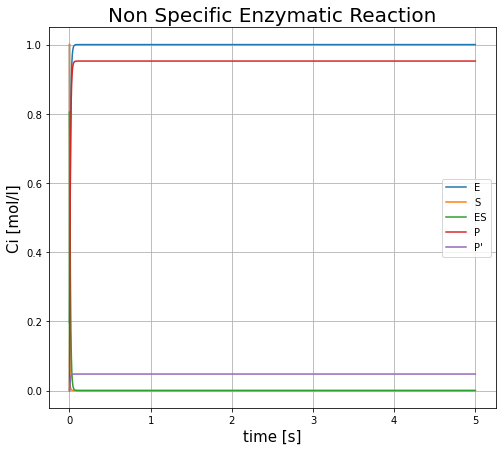

0.047619047619047714
0.952380952380955


In [9]:
#which parameters would you change to increase selectivity?
#increase kcat1 will allow better selectivity. Example: 

kf = 10000 #l/mol/s

kb = 200 #1/s

kcat1 = 100 #1/s

kcat2 = 5 #1/s

E0 = 1 #mol/l

initial_conditions = [E0*V, S0*V, ES0*V, P0*V, P0_1*V]

results = odeint(equation, initial_conditions, t)
CE, CS, CES, CP, CP_1 = results.T/V


#Plot figure of example change in selectivity
plt.figure(1, figsize=(8,7))
plt.title("Non Specific Enzymatic Reaction",  size=20)
plt.plot(t, CE, t, CS, t, CES, t, CP, t, CP_1)
plt.xlabel("time [s]", size=15)
plt.ylabel("Ci [mol/l]", size=15)
plt.xlim([0, 0.1])
plt.legend(["E", "S", "ES", "P", "P'"])

plt.grid()
plt.savefig('non1_enzymatic_reaction.eps', format='eps')
plt.show()

print(CP_1[-1]) #Undesired product concentration at steady state
print(CP[-1]) #Desired productconcentration at steady state